Streaming output truncated to the last 5000 lines.
Average Reward:  [2078.68475601 2638.16794808 2513.47703432]
Completed Plays:  800
Average Reward:  [2081.22824257 2646.8237012  2554.10170485]
Completed Plays:  800
Average Reward:  [2081.22824257 2646.8295588  2554.10170485]
Completed Plays:  800
Average Reward:  [2081.22824257 2646.8295588  2554.10661895]
Completed Plays:  900
Average Reward:  [2084.76195658 2662.56477432 2591.18033166]
Completed Plays:  900
Average Reward:  [2084.76195658 2662.5679281  2591.18033166]
Completed Plays:  900
Average Reward:  [2084.76195658 2662.5679281  2591.19137776]
Completed Plays:  1000
Average Reward:  [2087.31909354 2654.95526634 2624.35640772]
Completed Plays:  1000
Average Reward:  [2087.31909354 2654.94779342 2624.35640772]
Completed Plays:  1000
Average Reward:  [2087.31909354 2654.94779342 2624.35182061]
Completed Plays:  100
Average Reward:  [1926.51959763 1994.39580566 1989.44425697]
Completed Plays:  100
Average Reward:  [1926.51959763 1

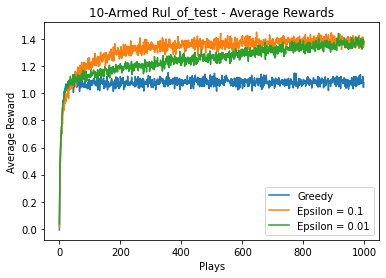

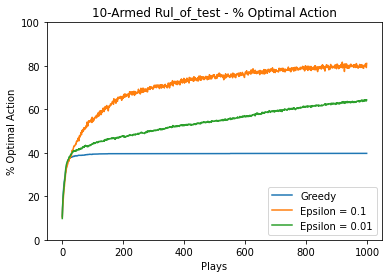

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Rul_of_test class containing the states and actions, and the overall rules of the test
class Rul_of_test(object):

    # Constructor
    def __init__(self, NumberArms, mean, StandardDev):

        # Number of arms
        self.NumberArms = NumberArms

        # Used for the Gaussian random actions
        self.mean = mean        # Mean
        self.StandardDev = StandardDev      # Standard Deviation

        self.ActionValues = np.zeros(NumberArms)   # Array to store action values
        self.optim = 0                  # Store optimal value for greedy
        self.reset()

    # Reset Rul_of_test for next iteration
    def reset(self):
        # Set random gaussian/normal values using numpy function, requires mean, standard deviation and number of arms
        self.ActionValues = np.random.normal(self.mean, self.StandardDev, self.NumberArms)

        # Identify the maximum value in action array
        self.optim = np.argmax(self.ActionValues)


# Agent Class - Controls the agents movement and behaviour in the environment interacting with the Rul_of_test
# and receives information on the current position
class Agent(object):

    # Constructor
    def __init__(self,NumberArms, EpsilonProb=0):
        self.NumberArms = NumberArms      # Number of arms
        self.EpsilonProb = EpsilonProb      # Epsilon probability

        self.timeStep = 0                    # Time Step t
        self.lastAction = None               # Store last action

        self.kAction = np.zeros(NumberArms)          # count of actions taken at time t
        self.reward_sum = np.zeros(NumberArms)             # Sums number of rewards
        self.valEstimates = np.zeros(NumberArms)     # action value estimates sum(rewards)/Amount


    # Return string for graph legend
    def __str__(self):
        return "Greedy" if self.EpsilonProb == 0 else f"Epsilon = {self.EpsilonProb}"
    # def __str__(self):
    #     if self.EpsilonProb == 0:
    #         return "Greedy"
    #     else:
    #         return "Epsilon = " + str(self.EpsilonProb)


    # Selects action based on a epsilon-greedy behaviour,
    # if epsilon equals zero, then the agent performs a greedy selection
    def action(self):

        ### POLICY: Epsilon method
        randProb = np.random.random()   # probability between 0-1
        if randProb < self.EpsilonProb:
            a = np.random.choice(len(self.valEstimates))    # Select random action

        # Greedy Method
        else:
            maxAction = np.argmax(self.valEstimates)     # Find max value estimate
            # identify the corresponding action, as array containing only actions with max
            action = np.where(self.valEstimates == np.argmax(self.valEstimates))[0]

            # If multiple actions contain the same value, randomly select an action
            if len(action) == 0:
                a = maxAction
            else:
                a = np.random.choice(action)

        # save last action in variable, and return result
        self.lastAction = a
        return a


    # Interpreter - updates the value extimates amounts based on the last action
    def interpreter(self, reward):
        # Add 1 to the number of action taken in step
        At = self.lastAction

        self.kAction[At] += 1       # Add 1 to action selection
        self.reward_sum[At] += reward     # Add reward to sum array

        # Calculate new action-value, sum(r)/ka
        self.valEstimates[At] = self.reward_sum[At]/self.kAction[At]

        # Increase time step
        self.timeStep += 1


    # Reset all variables for next iteration
    def reset(self):
        self.timeStep = 0                    # Time Step t
        self.lastAction = None               # Store last action

        self.kAction[:] = 0                  # count of actions taken at time t
        self.reward_sum[:] = 0
        self.valEstimates[:] = 0   # action value estimates Qt ~= Q*(a)

# Environment class to control all objects (agent/Rul_of_test)
class Environment(object):
# Constructor
    def __init__(self, Rul_of_test, agents, plays, iterations):
        self.Rul_of_test = Rul_of_test
        self.agents = agents
        self.plays = plays
        self.iterations = iterations


    # Runing Test
    def play(self):

        # number of plays X number of agents
        scoreArr = np.zeros((self.plays, len(self.agents)))
        # Array to maintain optimal count, Graph 2
        optimlArr = np.zeros((self.plays, len(self.agents)))

        # for number of iterations
        for iIter in range(self.iterations):

            # Print statement after every 100 iterations
            if (iIter%100) == 0:
                print("Completed Iterations: ",iIter)

            #Reset Rul_of_test and all agents
            self.Rul_of_test.reset()
            for agent in self.agents:
                agent.reset()


            # Loop for number of plays
            for jPlays in range(self.plays):
                agtCnt = 0

                for kAgent in self.agents:
                    actionT =  kAgent.action()

                    # Reward - normal dist (Q*(at), variance = 1)
                    rewardT = np.random.normal(self.Rul_of_test.ActionValues[actionT], scale=1)

                    # Agent checks state
                    kAgent.interpreter(reward=rewardT)

                    # Add score in arrary, graph 1
                    scoreArr[jPlays,agtCnt] += rewardT

                    # check the optimal action, add optimal to array, graph 2
                    if actionT == self.Rul_of_test.optim:
                        optimlArr[jPlays,agtCnt] += 1

                    agtCnt += 1
                    # Print average reward after every 100 plays
                    if (jPlays + 1) % 100 == 0:
                      total_reward = np.sum(scoreArr[jPlays-99:jPlays+1,:], axis=0) / 100
                      print("Completed Plays: ", jPlays + 1)
                      #print("Average Reward: ", total_reward)

        #return averages
        scoreAvg = scoreArr/self.iterations
        optimlAvg = optimlArr/self.iterations

        return scoreAvg, optimlAvg



## MAIN 
if __name__ == "__main__":
    start_time = time.time()    #time collection
    NumberArms = 10                  #number of bandit
    iterations = 2000         # iterations
    plays = 1000                # plays per iteration

    # Setup objects to contain infomration about the agents, Rul_of_test, and environment
    Rul_of_test = Rul_of_test(NumberArms=NumberArms,mean=0,StandardDev=1)
    agents = [Agent(NumberArms=NumberArms),Agent(NumberArms=NumberArms,EpsilonProb=0.1),Agent(NumberArms=NumberArms,EpsilonProb=0.01)]
    environment = Environment(Rul_of_test=Rul_of_test,agents=agents,plays=plays,iterations=iterations)

    # Run Environment
    print("Running...")
    g1Scores, g2Optimal = environment.play()
    print("Execution time: %s seconds" % (time.time() - start_time))


    #1 - Averate rewards 
    plt.title("10-Armed Rul_of_test - Average Rewards")
    plt.plot(g1Scores)
    plt.ylabel('Average Reward')
    plt.xlabel('Plays')
    plt.legend(agents, loc=4)
    plt.show()

    #1 - optimal selections
    plt.title("10-Armed Rul_of_test - % Optimal Action")
    plt.plot(g2Optimal * 100)
    plt.ylim(0, 100)
    plt.ylabel('% Optimal Action')
    plt.xlabel('Plays')
    plt.legend(agents, loc=4)
    plt.show()

Running...
Completed Iterations:  0
Completed Iterations:  100
Completed Iterations:  200
Completed Iterations:  300
Completed Iterations:  400
Completed Iterations:  500
Completed Iterations:  600
Completed Iterations:  700
Completed Iterations:  800
Completed Iterations:  900
Completed Iterations:  1000
Completed Iterations:  1100
Completed Iterations:  1200
Completed Iterations:  1300
Completed Iterations:  1400
Completed Iterations:  1500
Completed Iterations:  1600
Completed Iterations:  1700
Completed Iterations:  1800
Completed Iterations:  1900
Execution time: 126.26682806015015 seconds


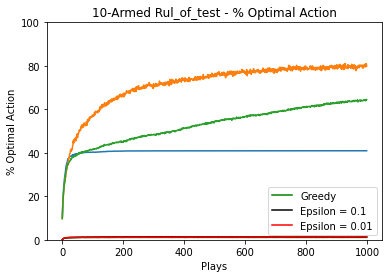

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Rul_of_test class containing the states and actions, and the overall rules of the test
class Rul_of_test(object):

    # Constructor
    def __init__(self, NumberArms, mean, StandardDev):

        # Number of arms
        self.NumberArms = NumberArms

        # Used for the Gaussian random actions
        self.mean = mean        # Mean
        self.StandardDev = StandardDev      # Standard Deviation

        self.ActionValues = np.zeros(NumberArms)   # Array to store action values
        self.optim = 0                  # Store optimal value for greedy
        self.reset()

    # Reset Rul_of_test for next iteration
    def reset(self):
        # Set random gaussian/normal values using numpy function, requires mean, standard deviation and number of arms
        self.ActionValues = np.random.normal(self.mean, self.StandardDev, self.NumberArms)

        # Identify the maximum value in action array
        self.optim = np.argmax(self.ActionValues)


# Agent Class - Controls the agents movement and behaviour in the environment interacting with the Rul_of_test
# and receives information on the current position
class Agent(object):

    # Constructor
    def __init__(self,NumberArms, EpsilonProb=0):
        self.NumberArms = NumberArms      # Number of arms
        self.EpsilonProb = EpsilonProb      # Epsilon probability

        self.timeStep = 0                    # Time Step t
        self.lastAction = None               # Store last action

        self.kAction = np.zeros(NumberArms)          # count of actions taken at time t
        self.reward_sum = np.zeros(NumberArms)             # Sums number of rewards
        self.valEstimates = np.zeros(NumberArms)     # action value estimates sum(rewards)/Amount


    # Return string for graph legend
    def __str__(self):
        return "Greedy" if self.EpsilonProb == 0 else f"Epsilon = {self.EpsilonProb}"
    # def __str__(self):
    #     if self.EpsilonProb == 0:
    #         return "Greedy"
    #     else:
    #         return "Epsilon = " + str(self.EpsilonProb)


    # Selects action based on a epsilon-greedy behaviour,
    # if epsilon equals zero, then the agent performs a greedy selection
    def action(self):

        ### POLICY: Epsilon method
        randProb = np.random.random()   # probability between 0-1
        if randProb < self.EpsilonProb:
            a = np.random.choice(len(self.valEstimates))    # Select random action

        # Greedy Method
        else:
            maxAction = np.argmax(self.valEstimates)     # Find max value estimate
            # identify the corresponding action, as array containing only actions with max
            action = np.where(self.valEstimates == np.argmax(self.valEstimates))[0]

            # If multiple actions contain the same value, randomly select an action
            if len(action) == 0:
                a = maxAction
            else:
                a = np.random.choice(action)

        # save last action in variable, and return result
        self.lastAction = a
        return a


    # Interpreter - updates the value extimates amounts based on the last action
    def interpreter(self, reward):
        # Add 1 to the number of action taken in step
        At = self.lastAction

        self.kAction[At] += 1       # Add 1 to action selection
        self.reward_sum[At] += reward     # Add reward to sum array

        # Calculate new action-value, sum(r)/ka
        self.valEstimates[At] = self.reward_sum[At]/self.kAction[At]

        # Increase time step
        self.timeStep += 1


    # Reset all variables for next iteration
    def reset(self):
        self.timeStep = 0                    # Time Step t
        self.lastAction = None               # Store last action

        self.kAction[:] = 0                  # count of actions taken at time t
        self.reward_sum[:] = 0
        self.valEstimates[:] = 0   # action value estimates Qt ~= Q*(a)

# Environment class to control all objects (agent/Rul_of_test)
class Environment(object):
# Constructor
    def __init__(self, Rul_of_test, agents, plays, iterations):
        self.Rul_of_test = Rul_of_test
        self.agents = agents
        self.plays = plays
        self.iterations = iterations


    # Runing Test
    def play(self):

        # number of plays X number of agents
        scoreArr = np.zeros((self.plays, len(self.agents)))
        # Array to maintain optimal count, Graph 2
        optimlArr = np.zeros((self.plays, len(self.agents)))

        # for number of iterations
        for iIter in range(self.iterations):

            # Print statement after every 100 iterations
            if (iIter%100) == 0:
                print("Completed Iterations: ",iIter)

            #Reset Rul_of_test and all agents
            self.Rul_of_test.reset()
            for agent in self.agents:
                agent.reset()


            # Loop for number of plays
            for jPlays in range(self.plays):
                agtCnt = 0

                for kAgent in self.agents:
                    actionT =  kAgent.action()

                    # Reward - normal dist (Q*(at), variance = 1)
                    rewardT = np.random.normal(self.Rul_of_test.ActionValues[actionT], scale=1)

                    # Agent checks state
                    kAgent.interpreter(reward=rewardT)

                    # Add score in arrary, graph 1
                    scoreArr[jPlays,agtCnt] += rewardT

                    # check the optimal action, add optimal to array, graph 2
                    if actionT == self.Rul_of_test.optim:
                        optimlArr[jPlays,agtCnt] += 1

                    agtCnt += 1
                    # Print average reward after every 100 plays
                    #if (jPlays + 1) % 100 == 0:
                      #total_reward = np.sum(scoreArr[jPlays-99:jPlays+1,:], axis=0) / 100
                      #print("Completed Plays: ", jPlays + 1)
                      #print("Average Reward: ", total_reward)

        #return averages
        scoreAvg = scoreArr/self.iterations
        optimlAvg = optimlArr/self.iterations

        return scoreAvg, optimlAvg



## MAIN 
if __name__ == "__main__":
    start_time = time.time()    #time collection
    NumberArms = 10                  #number of bandit
    iterations = 2000         # iterations
    plays = 1000                # plays per iteration

    # Setup objects to contain infomration about the agents, Rul_of_test, and environment
    Rul_of_test = Rul_of_test(NumberArms=NumberArms,mean=0,StandardDev=1)
    agents = [Agent(NumberArms=NumberArms),Agent(NumberArms=NumberArms,EpsilonProb=0.1),Agent(NumberArms=NumberArms,EpsilonProb=0.01)]
    environment = Environment(Rul_of_test=Rul_of_test,agents=agents,plays=plays,iterations=iterations)

    # Run Environment
    print("Running...")
    g1Scores, g2Optimal = environment.play()
    print("Execution time: %s seconds" % (time.time() - start_time))


    #1 - Averate rewards 
    colors = ['green', 'black', 'red']
    for i, agent in enumerate(agents):
      plt.plot(g1Scores[:, i], label=str(agent), color=colors[i])
      plt.ylabel('Average Reward')
      plt.xlabel('Plays')
      plt.legend(loc=4)


    #1 - optimal selections
    plt.title("10-Armed Rul_of_test - % Optimal Action")
    plt.plot(g2Optimal * 100)
    plt.ylim(0, 100)
    plt.ylabel('% Optimal Action')
    plt.xlabel('Plays')
    plt.legend(agents, loc=4)
    plt.show()